# Imports

In [1]:
import scipy
import numpy as np
from matplotlib import pyplot as plt

# Load data

In [2]:
# Load data and permute axes
matlab_contents = scipy.io.loadmat('./data/data.mat')
dwis = matlab_contents['dwis']
dwis = np.transpose(dwis, (3,0,1,2))
[Dc, Dx, Dy, Dz] = dwis.shape

In [3]:
# Check shape and type
print("dwis shape: "+str(dwis.shape))
print("dwis type: "+str(type(dwis)))

dwis shape: (108, 145, 174, 145)
dwis type: <class 'numpy.ndarray'>


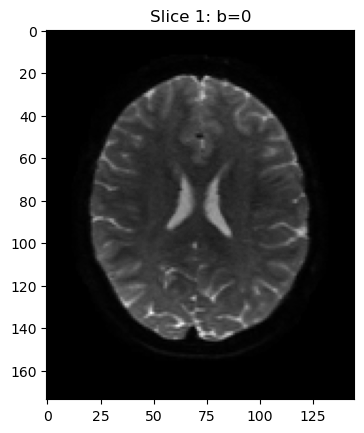

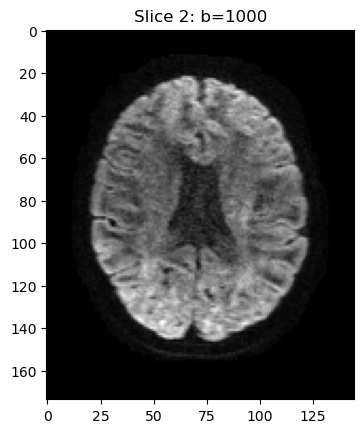

In [4]:
# Display 2 slices
slice1 = dwis[0,:,:,71]
slice2 = dwis[1,:,:,71]

plt.imshow(np.flipud(slice1.T), interpolation=None, cmap='gray')
plt.title("Slice 1: b=0")
plt.show()

plt.imshow(np.flipud(slice2.T), interpolation=None, cmap='gray')
plt.title("Slice 2: b=1000")
plt.show()

In [5]:
# Load gradient directions
bvecs = open('./data/bvecs', 'r')
qhat = bvecs.readlines()
bvecs.close()

# Remove newline characters
qhat = [line.strip('\n') for line in qhat]

#Split lines into components
qhat = [line.split() for line in qhat]

# Convert to double
qhat = np.asarray(qhat, dtype=np.double)

print('qhat = ')
print(qhat)
print("qhat shape: "+str(qhat.shape))
print("qhat type: "+str(type(qhat)))

qhat = 
[[ 0.       -0.93916   0.20412  -0.27643  -0.2196   -0.45469   0.
  -0.87544  -0.5209    0.79567  -0.49424  -0.44818   0.       -0.60534
  -0.17108  -0.88049   0.86169   0.017599  0.       -0.017846 -0.089202
   0.62075   0.68367   0.57191   0.        0.1895    0.99247  -0.24988
   0.57066   0.59536   0.        0.84897  -0.70476   0.12819  -0.48873
   0.81024   0.        0.37821  -0.14917  -0.38834  -0.47191   0.97729
   0.       -0.12841  -0.27272  -0.70383   0.823     0.20941   0.
  -0.67617   0.28501   0.92047  -0.21659   0.482     0.        0.16349
  -0.71752  -0.35228   0.78406  -0.67237   0.        0.71373  -0.9361
   0.019184 -0.38669   0.49837   0.       -0.020828  0.96878   0.913
  -0.13816   0.35645   0.       -0.11562  -0.49956  -0.49193   0.64308
  -0.27074   0.        0.80118  -0.65216  -0.37104  -0.91987  -0.35826
   0.        0.030761  0.77703  -0.79173  -0.090097 -0.37099   0.
  -0.65096   0.86124  -0.60639   0.30956   0.74561   0.        0.015152
  -0.18275   0

In [6]:
# Compute b-values
bvals = 1000*np.sum(np.multiply(qhat, qhat) , axis=0);

print('bvals = ')
print(bvals)
print("bvals shape: "+str(bvals.shape))
print("bvals type: "+str(type(bvals)))

bvals = 
[   0.          999.9979541  1000.0003225   999.9901514   999.9904009
  999.9995346     0.          999.9931716  1000.0035377   999.9971147
  999.994605   1000.003722      0.          999.9946678  1000.0072434
 1000.0030482  1000.0030427  1000.00929654    0.         1000.00975422
  999.9864082  1000.01100404 1000.0000789   999.99840823    0.
  999.9984888  1000.00072502  999.9973682  1000.0083116  1000.0035549
    0.          999.9925813  1000.0005604   999.9933634  1000.0063258
 1000.0073512     0.          999.99300462  999.9939206  1000.0071861
  999.9927678  1000.0049546     0.         1000.0051577   999.98777875
  999.9966755   999.9923693   999.9935673     0.          999.9970373
  999.9895238  1000.0004074   999.9927809  1000.00562172    0.
 1000.0059341   999.9967629   999.9921234   999.98836005  999.9982173
    0.         1000.0017242  1000.00294442 1000.00388436 1000.00237899
 1000.0046619     0.         1000.00694968 1000.00597762  999.99959903
 1000.0011997  1000.0

# Q.1.1.1.

## Cell 1.1.1.1: Perform parameter estimation only for 1 voxel

In [7]:
Avox = dwis[:,91,64,71]

# Compute design matrix and pseudo-inverse
G = np.array([np.ones(len(bvals)), -bvals*(qhat[0,:]**2), -2*bvals*qhat[0,:]*qhat[1,:], -2*bvals*qhat[0,:]*qhat[2,:], -bvals*(qhat[1,:]**2), -2*bvals*qhat[1,:]*qhat[2,:], -bvals*(qhat[2,:]**2)]).T
G_inv = np.linalg.pinv(G)

params = np.zeros(7)

# Check whether any measurement is negative
if(np.min(Avox)>0):
    print("Measurements OK")
    # Estimate parameters for 1 voxel
    params = G_inv @ np.log(Avox)
else:
    print("Warning negative measurements")
    
print("Parameters = ", params)

Measurements OK
Parameters =  [ 8.35502360e+00  9.40593352e-04  1.39244822e-04 -1.73568931e-04
  6.54053457e-04 -2.62573376e-04  7.76343284e-04]


##  Cell 1.1.1.2: Perform parameter estimation for all voxels in slice 72

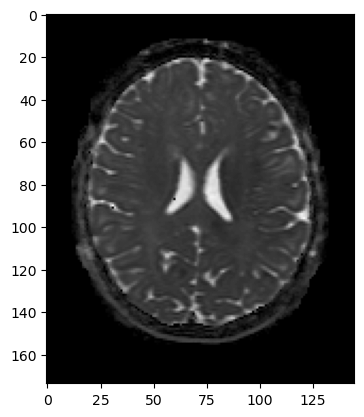

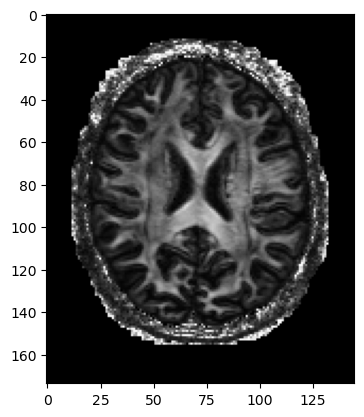

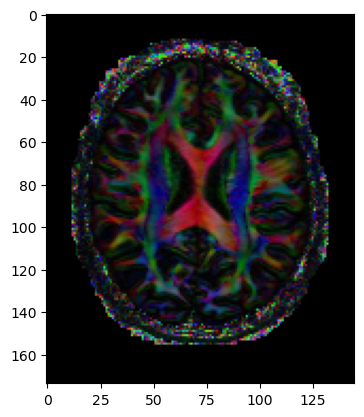

In [8]:
# Get diffusion tensor from parameter vector
def get_diff_tensor(p):
    return np.array([[p[1],p[2],p[3]],[p[2],p[4],p[5]],[p[3],p[5],p[6]]])

def display_array(arr, title=""):
    plt.imshow(np.flipud(arr.T), interpolation=None, cmap='gray')
    plt.title(title)
    plt.show()
    
def display_rgb_array(arr, title=""):
    plt.imshow(np.flipud(arr.transpose(1,0,2)), interpolation=None)
    plt.title(title)
    plt.show()

param_map = np.zeros((145,174,7))

# Compute design matrix and pseudo-inverse
G = np.array([np.ones(len(bvals)), -bvals*(qhat[0,:]**2), -2*bvals*qhat[0,:]*qhat[1,:], -2*bvals*qhat[0,:]*qhat[2,:], -bvals*(qhat[1,:]**2), -2*bvals*qhat[1,:]*qhat[2,:], -bvals*(qhat[2,:]**2)]).T
G_inv = np.linalg.pinv(G)

# Estimate parameters for all voxels in slice 72
for i in range(145):
    for j in range(174):
        A = dwis[:,i,j,71]
        # Check whether any measurement is negative
        if np.min(A)>0:
            params = G_inv @ np.log(A)
            param_map[i,j] = params

mean_diffusivity_map = np.zeros((145,174))

# Compute mean diffusivity for all voxels in slice 71
for i in range(145):
    for j in range(174):
        params = param_map[i,j]
        mean_diffusivity_map[i,j] = (params[1] + params[4] + params[6])/3

# Remove nagative values
mean_diffusivity_map[mean_diffusivity_map < 0] = 0

display_array(mean_diffusivity_map)

fractional_anisotropy_map = np.zeros((145,174))

# Compute fractional anisotropy for all voxels in slice 71
for i in range(145):
    for j in range(174):
        diffusion_tensor = get_diff_tensor(param_map[i,j])
        eig_vals, eig_vecs = np.linalg.eig(diffusion_tensor)
        # Prevent division by zero
        if(np.sum(eig_vals**2) != 0):
            fractional_anisotropy_map[i,j] = np.sqrt((1.5*np.sum((eig_vals - np.mean(eig_vals))**2))/np.sum(eig_vals**2))

display_array(fractional_anisotropy_map)

directional_colour_map = np.zeros((145,174,3))

# Compute directional colour encoding for all voxels in slice 71
for i in range(145):
    for j in range(174):
        diffusion_tensor = get_diff_tensor(param_map[i,j])
        eig_vals, eig_vecs = np.linalg.eig(diffusion_tensor)
        # Skip background voxels
        if(np.sum(eig_vals) != 0):
            max_eigval_index = np.argmax(eig_vals)
            max_eigvec = eig_vecs[:,max_eigval_index]
            directional_colour_map[i,j]=np.absolute(max_eigvec)*fractional_anisotropy_map[i,j]

# Normalize values to range[0,1]
directional_colour_map = (directional_colour_map - np.min(directional_colour_map)) / (np.max(directional_colour_map) - np.min(directional_colour_map))

display_rgb_array(directional_colour_map)

In [46]:
fractional_anisotropy_map[70,80]

0.6901785843680083

In [47]:
idx1 = 70
idx2 = 80
print(param_map[idx1,idx2][1])
print(param_map[idx1,idx2][4])
print(param_map[idx1,idx2][6])

0.0015393567372472762
0.00035138176552820463
0.00048523571014704326


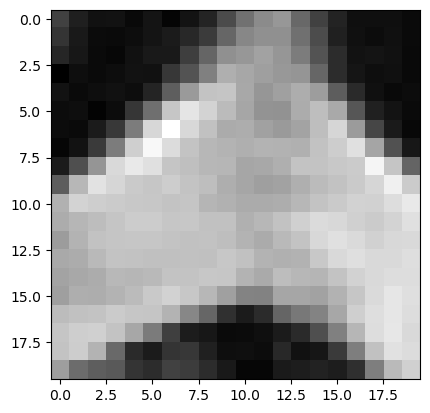

In [48]:
display_array(fractional_anisotropy_map[60:80,70:90])

In [51]:
dwis[:,idx1,idx2,71]

array([3330.8357 ,  734.8196 , 2259.4749 , 2083.146  , 1908.676  ,
       1506.41   , 3446.6035 ,  976.86163, 1679.7361 ,  831.5419 ,
       1341.7185 , 1905.188  , 3161.0583 , 1364.822  , 1915.3015 ,
        815.48846,  882.6714 , 2066.7876 , 3326.159  , 2144.532  ,
       1855.6033 , 1401.2975 , 1374.4161 , 1480.8113 , 3371.7651 ,
       1984.4697 ,  878.58344, 2068.0212 , 1795.2422 , 1178.3977 ,
       3004.8335 ,  909.7861 , 1259.2834 , 2331.161  , 1733.7606 ,
       1044.482  , 3172.265  , 1967.7646 , 1883.7976 , 2137.888  ,
       1551.1227 ,  814.4595 , 3326.096  , 2223.4958 , 2319.9182 ,
       1213.7465 ,  879.31396, 1917.3217 , 3217.2146 , 1291.4818 ,
       2150.65   ,  775.0191 , 1993.2432 , 1258.4889 , 3291.88   ,
       1825.8983 , 1161.6428 , 1421.3486 ,  995.3987 , 1221.9568 ,
       3222.5505 , 1275.5795 ,  629.41   , 2348.6345 , 1579.4183 ,
       1877.9565 , 3263.3748 , 2056.2297 ,  910.80194,  815.68866,
       1918.382  , 1762.6041 , 3112.621  , 1983.737  , 1952.50

In [53]:
b_0_measurements = np.array([3330.8357, 3446.6035, 3161.0583, 3326.159, 3371.7651, 3004.8335, 3172.265, 3326.096, 3217.2146, 3291.88, 3222.5505, 3263.3748, 3112.621, 3109.572, 3347.5723, 3369.6494, 3389.0942, 2990.5837])
np.std(b_0_measurements)

128.75049916949618

In [52]:
bvals

array([   0.        ,  999.9979541 , 1000.0003225 ,  999.9901514 ,
        999.9904009 ,  999.9995346 ,    0.        ,  999.9931716 ,
       1000.0035377 ,  999.9971147 ,  999.994605  , 1000.003722  ,
          0.        ,  999.9946678 , 1000.0072434 , 1000.0030482 ,
       1000.0030427 , 1000.00929654,    0.        , 1000.00975422,
        999.9864082 , 1000.01100404, 1000.0000789 ,  999.99840823,
          0.        ,  999.9984888 , 1000.00072502,  999.9973682 ,
       1000.0083116 , 1000.0035549 ,    0.        ,  999.9925813 ,
       1000.0005604 ,  999.9933634 , 1000.0063258 , 1000.0073512 ,
          0.        ,  999.99300462,  999.9939206 , 1000.0071861 ,
        999.9927678 , 1000.0049546 ,    0.        , 1000.0051577 ,
        999.98777875,  999.9966755 ,  999.9923693 ,  999.9935673 ,
          0.        ,  999.9970373 ,  999.9895238 , 1000.0004074 ,
        999.9927809 , 1000.00562172,    0.        , 1000.0059341 ,
        999.9967629 ,  999.9921234 ,  999.98836005,  999.99821

In [49]:
get_diff_tensor(param_map[idx1,idx2])

array([[ 1.53935674e-03,  6.85532052e-06, -9.77200862e-05],
       [ 6.85532052e-06,  3.51381766e-04, -6.95340923e-05],
       [-9.77200862e-05, -6.95340923e-05,  4.85235710e-04]])

In [50]:
np.linalg.eig(get_diff_tensor(param_map[idx1,idx2]))

EigResult(eigenvalues=array([0.00154849, 0.00050656, 0.00032093]), eigenvectors=array([[ 0.99567605,  0.08882327,  0.02719625],
       [ 0.0110592 , -0.40402957,  0.91467907],
       [-0.09223287,  0.91042327,  0.40326488]]))

# Q.1.1.2.

## Cell 1.1.2.1: Define ball-and-stick model

In [9]:
def ball_stick(x):
    # Behrens et al, 2003
    # Characterization and Propagation of Uncertainty in Diffusion-Weighted MR Imaging
    # https://doi.org/10.1002/mrm.10609
    
    # Extract the parameters
    # diff: diffusion
    # f: fraction of signal contributed by diffusion tensor along fiber direction theta, phi
    S0, diff, f, theta, phi = x
    
    # Fiber direction
    fibdir = np.array([
        np.cos(phi) * np.sin(theta),
        np.sin(phi) * np.sin(theta),
        np.cos(theta),
    ])
    
    tile = np.tile(fibdir, (len(bvals), 1))
    fibdotgrad = np.sum(qhat.T * tile, axis=1)
    
    S = S0 * (f * np.exp(-bvals * diff * (fibdotgrad**2)) + (1-f) * np.exp(-bvals * diff))
    
    return S


def BallStickSSD(x, voxel):
    S = ball_stick(x)
    # Compute sum of square differences
    return np.sum((voxel - S) ** 2)

## Cell 1.1.2.2: Fit the model at 1 voxel

In [10]:
startx = np.array([3300, 1.0e-03, 4.5e-01, 1.0, 1.0])
#startx = np.array([4200, 4e-4, 0.25, 0, 0])

results = scipy.optimize.minimize(
    fun=BallStickSSD,
    x0=startx,
    args=(Avox,),
)

results

C:\Users\ressl\AppData\Local\Temp\ipykernel_11404\1610393769.py:21: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * diff * (fibdotgrad**2)) + (1-f) * np.exp(-bvals * diff))
C:\Users\ressl\miniconda3\envs\cm4bi\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\ressl\AppData\Local\Temp\ipykernel_11404\1610393769.py:21: RuntimeWarning: overflow encountered in exp
  S = S0 * (f * np.exp(-bvals * diff * (fibdotgrad**2)) + (1-f) * np.exp(-bvals * diff))
C:\Users\ressl\AppData\Local\Temp\ipykernel_11404\1610393769.py:29: RuntimeWarning: overflow encountered in square
  return np.sum((voxel - S) ** 2)


  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 54806552.90143531
        x: [ 3.300e+03  1.000e-03  4.500e-01  1.000e+00  1.000e+00]
      nit: 0
      jac: [-4.472e+04  4.990e+10  1.769e+07 -1.443e+07  1.245e+07]
 hess_inv: [[1 0 ... 0 0]
            [0 1 ... 0 0]
            ...
            [0 0 ... 1 0]
            [0 0 ... 0 1]]
     nfev: 30
     njev: 3

## Cell 1.1.2.3: Plot the data and model predictions

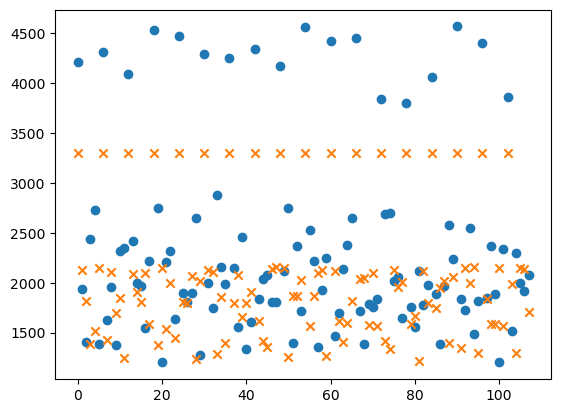

In [11]:
xs = np.arange(0,len(Avox))
plt.figure()
plt.scatter(xs, Avox, marker='o')
predictions = ball_stick([3.300e+03, 1.000e-03, 4.500e-01, 1.000e+00, 1.000e+00])
plt.scatter(xs, predictions, marker='x')
plt.show()

In [12]:
ball_stick([ 3.300e+03 , 1.000e-03,  4.500e-01 , 1.000e+00 , 1.000e+00])

array([3300.        , 2130.59168653, 1814.11565317, 1385.92466978,
       1518.94826628, 2142.8217789 , 3300.        , 1423.86329958,
       2105.99397894, 1691.96009073, 1843.33822167, 1249.13858438,
       3300.        , 2086.56274107, 1908.52229276, 1809.37987788,
       2102.0388854 , 1585.67520756, 3300.        , 1378.32129775,
       2146.25888971, 1531.66504773, 1997.86146529, 1449.6941847 ,
       3300.        , 1802.98129765, 1791.83464439, 2070.52736788,
       1234.75335612, 2013.90577295, 3300.        , 2122.26886965,
       2109.52670432, 1289.9701767 , 1855.13835043, 1393.87673563,
       3300.        , 1799.97859833, 2078.46766493, 1652.14771792,
       1800.7368549 , 1906.82845208, 3300.        , 1617.85513894,
       1418.25617838, 1360.30021012, 2133.2206723 , 2152.68055079,
       3300.        , 2143.29719943, 1250.65815551, 1865.58947449,
       1866.80529569, 2026.08105889, 3300.        , 1569.56813488,
       1863.85059533, 2092.1382154 , 2129.20171278, 1265.67530

# Q.1.1.3.

## Cell 1.1.3.1: Adapt the ball-and-stick model to use only realistic values

In [13]:
def parameter_transform(x):
    S0, diff, f, theta, phi = x
    
    S0 = S0*S0
    diff = diff*diff
    
    if(not (0 <= f and f <= 1)):
        f = 1/f
        
        if(f < 0):
            f = f*(-1)
    
    return np.array([S0, diff, f, theta, phi])

def inverse_parameter_transform(x):
    S0, diff, f, theta, phi = x
    
    S0 = np.sqrt(S0)
    diff = np.sqrt(diff)
    
    return np.array([S0, diff, f, theta, phi])

def ball_stick2(x):
    # Behrens et al, 2003
    # Characterization and Propagation of Uncertainty in Diffusion-Weighted MR Imaging
    # https://doi.org/10.1002/mrm.10609
    
    # Extract the parameters
    # diff: diffusion
    # f: fraction of signal contributed by diffusion tensor along fiber direction theta, phi
    S0, diff, f, theta, phi = parameter_transform(x)
    
    # Fiber direction
    fibdir = np.array([
        np.cos(phi) * np.sin(theta),
        np.sin(phi) * np.sin(theta),
        np.cos(theta),
    ])
    
    tile = np.tile(fibdir, (len(bvals), 1))
    fibdotgrad = np.sum(qhat.T * tile, axis=1)
    
    S = S0 * (f * np.exp(-bvals * diff * (fibdotgrad**2)) + (1-f) * np.exp(-bvals * diff))
    
    return S


def BallStickSSD2(x, voxel):
    S = ball_stick2(x)
    # Compute sum of square differences
    return np.sum((voxel - S) ** 2)

## Cell 1.1.3.2: Run the non-linear optimization

In [14]:
startx2 = np.array([np.sqrt(3300), np.sqrt(1.0e-03), 4.5e-01, 1.0, 1.0])

results2 = scipy.optimize.minimize(
    fun=BallStickSSD2,
    x0=startx2,
    args=(Avox,),
)

results2

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 5871996.800794408
        x: [ 6.525e+01 -3.378e-02  3.573e-01  2.161e+00  5.794e-01]
      nit: 21
      jac: [-1.875e-01 -1.406e+01 -2.250e+00  1.312e+00  1.438e+00]
 hess_inv: [[ 1.641e-06 -6.792e-10 ... -3.985e-09 -4.509e-09]
            [-6.792e-10  2.781e-12 ...  5.728e-12  4.500e-12]
            ...
            [-3.985e-09  5.728e-12 ...  1.783e-08  6.817e-09]
            [-4.509e-09  4.500e-12 ...  6.817e-09  2.855e-08]]
     nfev: 390
     njev: 63

## Cell 1.1.3.3: Plot the resulting fit

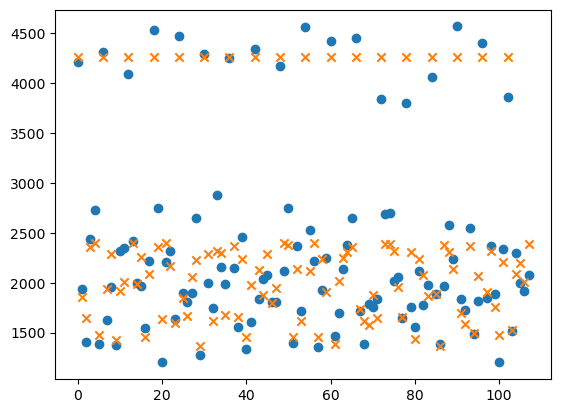

In [15]:
xs = np.arange(0,len(Avox))
plt.figure()
plt.scatter(xs, Avox, marker='o')
predictions = ball_stick2([6.525e+01, -3.378e-02,  3.573e-01,  2.161e+00,  5.794e-01])
plt.scatter(xs, predictions, marker='x')
plt.show()

# Q.1.1.4.

## Cell 1.1.4.1: Try 1000 different starting positions

In [16]:
original_start_position = np.array([3300, 1.0e-03, 4.5e-01, 1.0, 1.0])

#voxel_above = dwis[:,91,64,72]

final_errors = []

for i in range(1000):
    if i % 100 == 0:
        print(i/10,'%')
    elif i == 999:
        print(100, '%')
    #S0 = np.abs(original_start_position[0] + np.random.normal(0, 700))
    #diff = np.abs(original_start_position[1] + np.random.normal(0, 3.0e-04))
    #f = original_start_position[2] + np.random.normal(0, 0.3)
    #theta = original_start_position[3] + np.random.normal(0, 3.5)
    #phi = original_start_position[4] + np.random.normal(0, 3.5)
    
    S0 = np.abs(original_start_position[0] + np.random.normal(0, 1000))
    diff = np.abs(original_start_position[1] + np.random.normal(0, 7.0e-04))
    f = original_start_position[2] + np.random.normal(0, 0.7)
    theta = original_start_position[3] + np.random.normal(0, 4.5)
    phi = original_start_position[4] + np.random.normal(0, 4.5)
    
    start_position = np.array([np.sqrt(S0), np.sqrt(diff), f, theta, phi])
    
    result = scipy.optimize.minimize(
    fun=BallStickSSD2,
    x0=start_position,
    args=(Avox,),
    )
    
    final_errors.append(result.fun)

final_errors = np.array(final_errors)

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %
100 %


## Cell 1.1.4.2: Plot histogram of achieved error

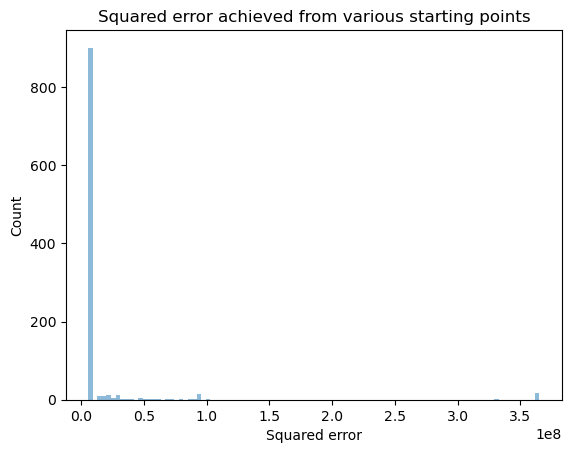

In [17]:
bins = np.arange(4000000, 20000000, 1000000)
plt.hist(final_errors, bins=100, alpha=0.5)
plt.title('Squared error achieved from various starting points')
plt.xlabel('Squared error')
plt.ylabel('Count')
plt.show()

## Cell 1.1.4.3: Proportion of runs that found the minimum error

In [18]:
len(final_errors[final_errors<5900000])/len(final_errors)

0.9

# Q.1.1.5.

## Cell 1.1.5.1: Compute parameter maps over 1 slice

In [28]:
original_start_position = np.array([3300, 1.0e-03, 4.5e-01, 1.0, 1.0])

S0_map = np.zeros((145,174))
d_map = np.zeros((145,174))
f_map = np.zeros((145,174))
error_map = np.zeros((145,174))
fibre_direction_map = np.zeros((145,174,2))

for i in range(145):
    print(i)
    for j in range(174):
        errors = []
        params = []
        
        voxel = dwis[:,i,j,71]
        
        # Skip background voxels
        if(not np.any(voxel)):
            continue
        
        for k in range(2):
            S0 = np.abs(original_start_position[0] + np.random.normal(0, 1000))
            diff = np.abs(original_start_position[1] + np.random.normal(0, 7.0e-04))
            f = original_start_position[2] + np.random.normal(0, 0.7)
            theta = original_start_position[3] + np.random.normal(0, 4.5)
            phi = original_start_position[4] + np.random.normal(0, 4.5)

            start_position = np.array([np.sqrt(S0), np.sqrt(diff), f, theta, phi])

            result = scipy.optimize.minimize(
            fun=BallStickSSD2,
            x0=start_position,
            args=(voxel,),
            )
            
            errors.append(result.fun)
            params.append(result.x)
            
        best_params = None
        best_error = None
        
        if errors[0] < errors[1]:
            best_params = params[0]
            best_error = errors[0]
        else:
            best_params = params[1]
            best_error = errors[1]
        
        S0 = best_params[0]
        d = best_params[1]
        f = best_params[2]
        theta = best_params[3]
        phi = best_params[4]
        
        # Perform inverse transformation to recover parameters
        S0_map[i,j] = S0 * S0
        d_map[i,j] = d * d
        f_map[i,j] = f
        error_map[i,j] = best_error
        fibre_direction_map[i,j] = np.array([np.cos(phi) * np.sin(theta), np.sin(phi) * np.sin(theta)])*f



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144


## Cell 1.1.5.2: Function for displaying the direction map

In [102]:
def display_quiver(directions):
    # Creating arrow
    x = np.arange(0, 145)
    y = np.arange(0, 174)

    X, Y = np.meshgrid(x, y)

    # creating plot
    fig, ax = plt.subplots(figsize =(14, 8))
    ax.quiver(X, Y, directions[:,:,0].T.flatten(), directions[:,:,1].T.flatten())

    ax.xaxis.set_ticks([])
    ax.yaxis.set_ticks([])
    #ax.axis([-0.3, 2.3, -0.3, 2.3])
    ax.set_aspect('equal')

    # show plot
    plt.show()

## Cell 1.1.5.3: Clip noisy values

In [139]:
d_map_cp = np.copy(d_map)
d_map_cp[d_map_cp > 0.02] = 0

f_map_cp = np.copy(f_map)

for i in range(f_map_cp.shape[0]):
    for j in range(f_map_cp.shape[1]):
        
        if(not (0 <= f_map_cp[i,j] and f_map_cp[i,j] <= 1)):
            
            if(np.abs(f_map_cp[i,j]) > 1):
                f_map_cp[i,j] = 1/f_map_cp[i,j]

            if(f_map_cp[i,j] < 0):
                f_map_cp[i,j] = f_map_cp[i,j]*(-1)

error_map_cp = np.copy(error_map)

error_map_cp[error_map_cp>20000000] = 20000000

fibre_direction_map_cp = np.copy(fibre_direction_map)
fibre_direction_map_cp[fibre_direction_map_cp>10] = 10
fibre_direction_map_cp[fibre_direction_map_cp<-10] = -10

## Cell 1.1.5.4: Plot the parameter maps

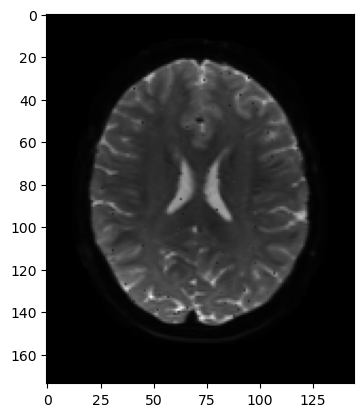

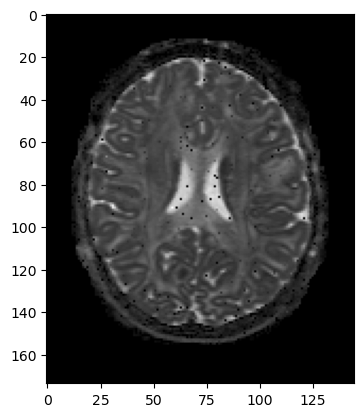

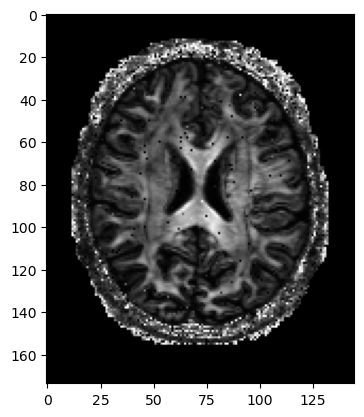

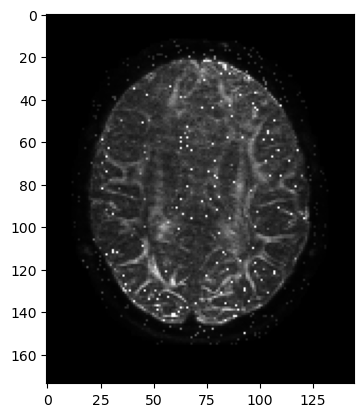

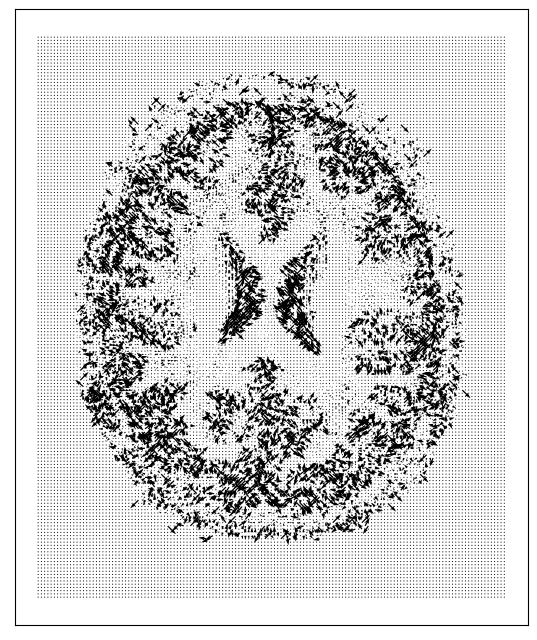

In [140]:
display_array(S0_map)
display_array(d_map_cp)
display_array(f_map_cp)
display_array(error_map_cp)
display_quiver(fibre_direction_map_cp)

# Q.1.2.1.

In [ ]:
Avox = dwis[:,91,64,71]

data_samples = []

S0_samples = []
d_samples = []
f_samples = []
S0_samples = []
S0_samples = []

for i in range(1000):
    data_samples.append(choices(Avox, k=108))

for i in range(1000):
    errors = []
    params = []

    voxel = Avox

    # Skip background voxels
    if(not np.any(voxel)):
        continue

    for k in range(2):
        S0 = np.abs(original_start_position[0] + np.random.normal(0, 1000))
        diff = np.abs(original_start_position[1] + np.random.normal(0, 7.0e-04))
        f = original_start_position[2] + np.random.normal(0, 0.7)
        theta = original_start_position[3] + np.random.normal(0, 4.5)
        phi = original_start_position[4] + np.random.normal(0, 4.5)

        start_position = np.array([np.sqrt(S0), np.sqrt(diff), f, theta, phi])

        result = scipy.optimize.minimize(
        fun=BallStickSSD2,
        x0=start_position,
        args=(voxel,),
        )

        errors.append(result.fun)
        params.append(result.x)

    best_params = None
    best_error = None

    if errors[0] < errors[1]:
        best_params = params[0]
        best_error = errors[0]
    else:
        best_params = params[1]
        best_error = errors[1]

    S0 = best_params[0]
    d = best_params[1]
    f = best_params[2]
    theta = best_params[3]
    phi = best_params[4]